Saving book_genres.csv to book_genres (2).csv
📄 Dataset columns: ['author_popularity', 'book_length', 'num_keywords', 'genre']

📊 Classification Report:

              precision    recall  f1-score   support

     fantasy       0.25      0.50      0.33         4
     fiction       1.00      1.00      1.00         1
     mystery       0.62      0.50      0.56        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.58      0.50      0.52        20



<ipython-input-6-a2603d70bc0b>:59: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


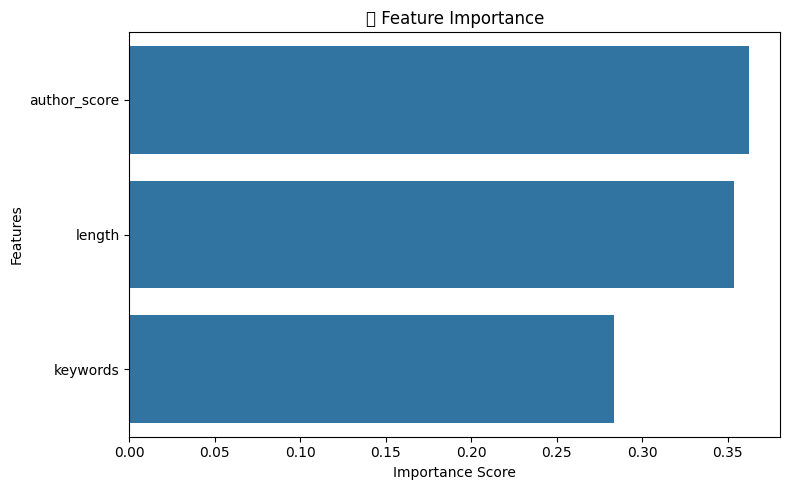

<ipython-input-6-a2603d70bc0b>:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


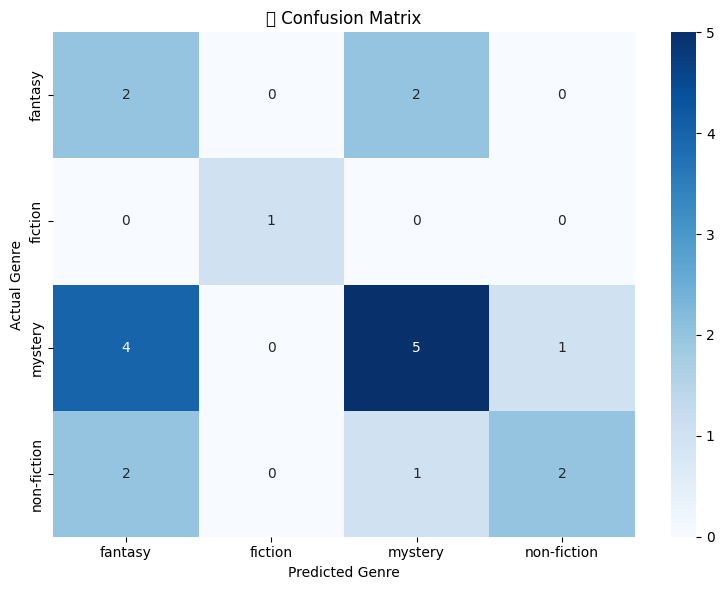

In [6]:
# Step 1: Import libraries
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Upload the dataset
from google.colab import files
uploaded = files.upload()

# Step 3: Load the CSV file
df = pd.read_csv(next(iter(uploaded)))

# Step 4: Display column names to confirm structure
print("📄 Dataset columns:", df.columns.tolist())

# Step 5: Rename columns for clarity (optional)
df.rename(columns={
    'author_popularity': 'author_score',
    'book_length': 'length',
    'num_keywords': 'keywords'
}, inplace=True)

# Step 6: Handle missing values
df.fillna(0, inplace=True)

# Step 7: Prepare features and labels
X = df[['author_score', 'length', 'keywords']]
y = df['genre']

# Step 8: Encode genre labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 10: Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 11: Make predictions and evaluate
y_pred = model.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 12: Plot Feature Importances
plt.figure(figsize=(8, 5))
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('🔍 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Step 13: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('📊 Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.tight_layout()
plt.show()
